<a href="https://colab.research.google.com/github/bonareri/Python-Data-Analysis/blob/main/Youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd


In [3]:
#Using kaggle
! pip install kaggle

In [6]:
#Getting data  from kaggle
#Getting the dataset
!kaggle datasets download -d nelgiriyewithana/global-youtube-statistics-2023

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023
License(s): other
  0% 0.00/60.1k [00:00<?, ?B/s]
100% 60.1k/60.1k [00:00<00:00, 78.2MB/s]


In [7]:
import zipfile
zipfile_path = '/content/global-youtube-statistics-2023.zip'
csv_file = zipfile_path.replace('zip', '')
with zipfile.ZipFile(zipfile_path, 'r') as file:
  file.extractall()
  print('Done')

Done


In [27]:

youtube = pd.read_csv('/content/Global YouTube Statistics.csv', encoding='latin-1')

In [10]:
youtube.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


## Data Cleaning

In [28]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [32]:
#dropping columns Abbreviation
youtube.drop(['Abbreviation','video_views_for_the_last_30_days','subscribers_for_last_30_days','Population'], axis=1, inplace=True)

In [29]:
print(youtube[['created_year', 'created_month', 'created_date']].head())
print(youtube['created_month'].unique())  # Identify non-numeric months

   created_year created_month  created_date
0        2006.0           Mar          13.0
1        2006.0           Mar           5.0
2        2012.0           Feb          20.0
3        2006.0           Sep           1.0
4        2006.0           Sep          20.0
['Mar' 'Feb' 'Sep' 'May' 'Apr' 'Jan' 'Dec' 'Jun' 'Aug' 'Jul' 'Oct' 'Nov'
 nan]


In [24]:


# Map months to numeric values
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

# Convert 'created_month' to month numbers
youtube['created_month_num'] = youtube['created_month'].map(month_map)

# Convert to datetime with proper year, month, and day columns
youtube['created_datetime'] = pd.to_datetime(
    youtube['created_year'].astype(int).astype(str) + '-' +
    youtube['created_month_num'].astype(str) + '-' +
    youtube['created_date'].astype(int).astype(str),
    errors='coerce'
)

# Display the dataframe to verify
print(youtube)

   created_year created_month  created_date  created_month_num  \
0        2006.0           Mar          13.0                  3   
1        2006.0           Mar           5.0                  3   
2        2012.0           Feb          20.0                  2   
3        2006.0           Sep           1.0                  9   
4        2006.0           Sep          20.0                  9   

  created_datetime  
0       2006-03-13  
1       2006-03-05  
2       2012-02-20  
3       2006-09-01  
4       2006-09-20  


In [33]:
youtube.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'channel_type', 'video_views_rank',
       'country_rank', 'channel_type_rank', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'created_year', 'created_month',
       'created_date', 'Gross tertiary education enrollment (%)',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [34]:
#checking null values
youtube.isnull().sum()

,0
rank,0
Youtuber,0
subscribers,0
video views,0
category,46
Title,0
uploads,0
Country,122
channel_type,30
video_views_rank,1


In [35]:
#Drop null values for country where rows are missing country
youtube.dropna(subset=['Country'], inplace=True)

#Drop null values for created_year, created_month, created_date
youtube.dropna(subset=['created_year', 'created_month', 'created_date'], inplace=True)

In [36]:
#Filling in missing categorical values with mode
youtube['category'].fillna(youtube['category'].mode()[0], inplace=True)
youtube['channel_type'].fillna(youtube['channel_type'].mode()[0], inplace=True)

<ipython-input-36-262472a3eeda>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  youtube['category'].fillna(youtube['category'].mode()[0], inplace=True)
<ipython-input-36-262472a3eeda>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [ ]:
#Histogram to show Distribution of values for non-categorical values
youtube.hist(figsize=(10, 10))
plt.show()



In [13]:
#percentage of null values
youtube.isnull().sum()*100/len(youtube)

,0
rank,0.000000
Youtuber,0.000000
subscribers,0.000000
video views,0.000000
category,4.623116
Title,0.000000
uploads,0.000000
Country,12.261307
Abbreviation,12.261307
channel_type,3.015075


<Axes: >

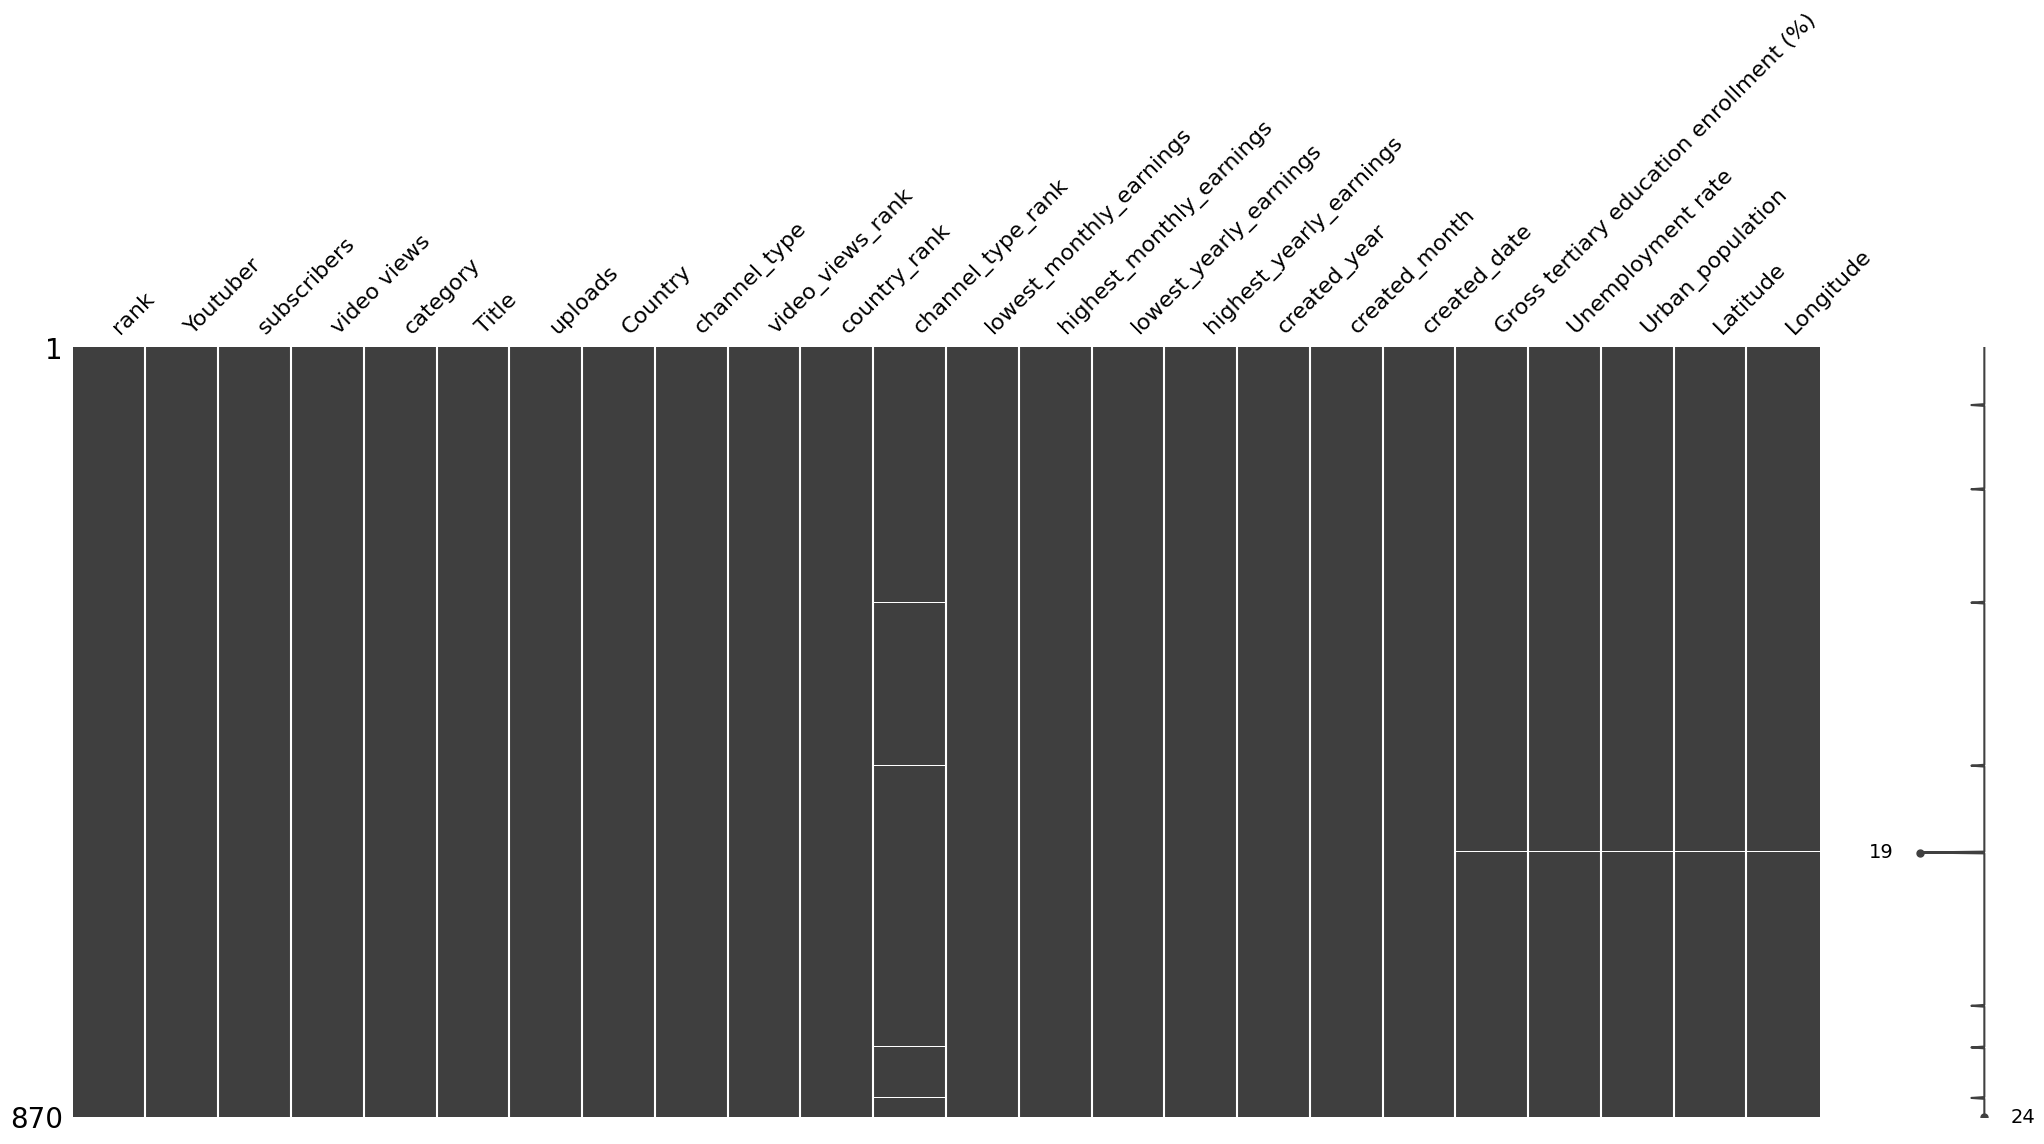

In [37]:
#msn matrix
import missingno as msno
msno.matrix(youtube)

In [17]:
youtube.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [38]:
#check missing values
youtube.isnull().sum()

,0
rank,0
Youtuber,0
subscribers,0
video views,0
category,0
Title,0
uploads,0
Country,0
channel_type,0
video_views_rank,0


In [39]:
#drop the rows with missing values for Gross tertiary education, unemployment rate, urban population , latitude, longitude
youtube.dropna(subset=['Gross tertiary education enrollment (%)', 'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'], inplace=True)

In [41]:
youtube.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'channel_type', 'video_views_rank',
       'country_rank', 'channel_type_rank', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'created_year', 'created_month',
       'created_date', 'Gross tertiary education enrollment (%)',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [42]:
import pandas as pd

# Example youtube dataframe (assuming you already have this)
# youtube = pd.DataFrame(...)

# Map months to numeric values
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

# Convert 'created_month' to month numbers
youtube['created_month_num'] = youtube['created_month'].map(month_map)

# Combine 'created_year', 'created_month_num', and 'created_date' to create a datetime column
youtube['created_datetime'] = pd.to_datetime(
    youtube['created_year'].astype(int).astype(str) + '-' +
    youtube['created_month_num'].astype(str) + '-' +
    youtube['created_date'].astype(int).astype(str),
    errors='coerce'  # This will handle any invalid or missing values
)

# Drop the temporary 'created_month_num' column if no longer needed
youtube = youtube.drop(columns=['created_month_num'])

# Display the dataframe to verify
print(youtube[['created_year', 'created_month', 'created_date', 'created_datetime']])




     created_year created_month  created_date created_datetime
0          2006.0           Mar          13.0       2006-03-13
1          2006.0           Mar           5.0       2006-03-05
2          2012.0           Feb          20.0       2012-02-20
3          2006.0           Sep           1.0       2006-09-01
4          2006.0           Sep          20.0       2006-09-20
..            ...           ...           ...              ...
990        2017.0           Feb          12.0       2017-02-12
991        2018.0           Sep          14.0       2018-09-14
992        2006.0           Sep          11.0       2006-09-11
993        2012.0           May           9.0       2012-05-09
994        2017.0           Aug           1.0       2017-08-01

[869 rows x 4 columns]


In [43]:
youtube.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'channel_type', 'video_views_rank',
       'country_rank', 'channel_type_rank', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'created_year', 'created_month',
       'created_date', 'Gross tertiary education enrollment (%)',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude',
       'created_datetime'],
      dtype='object')

In [45]:
#drop the created_year, created_month, and created_date
youtube = youtube.drop(columns=['created_year', 'created_month', 'created_date'])

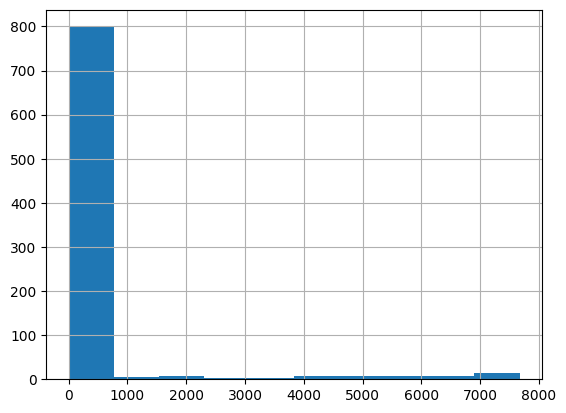

In [48]:
#Histogram to show distribution of values for Channel_type_rank
youtube['channel_type_rank'].hist()
plt.show()

In [49]:
#Replacing missing values using median
youtube['channel_type_rank'].fillna(youtube['channel_type_rank'].median(), inplace=True)

<ipython-input-49-56febade65de>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  youtube['channel_type_rank'].fillna(youtube['channel_type_rank'].median(), inplace=True)


In [46]:
youtube.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'channel_type', 'video_views_rank',
       'country_rank', 'channel_type_rank', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'Gross tertiary education enrollment (%)',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude',
       'created_datetime'],
      dtype='object')

In [50]:
youtube.isnull().sum()

,0
rank,0
Youtuber,0
subscribers,0
video views,0
category,0
Title,0
uploads,0
Country,0
channel_type,0
video_views_rank,0


#Data Analysis

                                             rank  subscribers  video views  \
rank                                     1.000000    -0.635576    -0.463280   
subscribers                             -0.635576     1.000000     0.786803   
video views                             -0.463280     0.786803     1.000000   
uploads                                 -0.061112     0.083081     0.165588   
video_views_rank                        -0.003158     0.031562    -0.059536   
country_rank                             0.010561     0.039977    -0.064274   
channel_type_rank                       -0.001993     0.034217    -0.049203   
lowest_monthly_earnings                 -0.279325     0.435860     0.579073   
highest_monthly_earnings                -0.278872     0.435418     0.578341   
lowest_yearly_earnings                  -0.279520     0.435966     0.579765   
highest_yearly_earnings                 -0.279344     0.435863     0.579080   
Gross tertiary education enrollment (%) -0.038194   

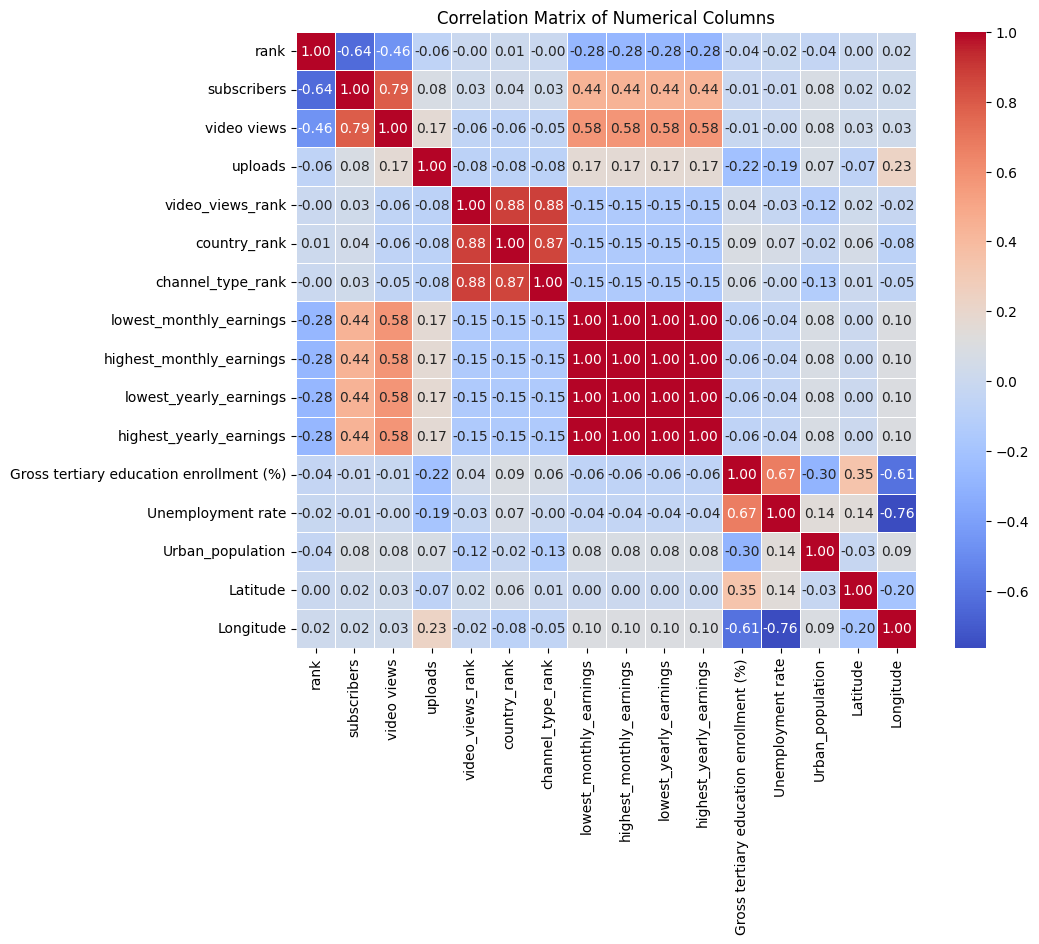

In [52]:
import seaborn as sns
# Step 1: Select only numerical columns
numerical_columns = youtube.select_dtypes(include=['float64', 'int64'])

# Step 2: Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

# Display the correlation matrix
print(correlation_matrix)

# Step 3 (Optional): Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()


In [53]:
#countries with highest number of subcribers
top_countries = youtube.groupby('Country')['subscribers'].sum().nlargest(10)
top_countries

,subscribers
Country,
United States,7315100000
India,4310600000
Brazil,1207300000
United Kingdom,917400000
Mexico,626900000
Indonesia,534100000
South Korea,481700000
Russia,407200000
Thailand,386500000


In [54]:
# GeoJSON URL
url = "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson"

# Load the GeoJSON data
gdf = gpd.read_file(url)

# Display some basic information
gdf

NameError: name 'gpd' is not defined

In [ ]:
youtube_2 = youtube.merge(gdf, how='inner', right_on='admin', left_on='Country')
#world_data3.head()